# Predict Customer Churn Project: 

 <br> 

**Business Problem Summary:**  
A telecom company is looking for an effective way to predict customer churn to inform their client retention strategies. Using a dataset containing information about over 3,000 current and past customers, I'm going to select a classification algorithm that should accurately predict if a customer is about to churn and also list what data can serve as reliable predictors for potentially losing that customer. I plan on exploring at least two classification methods to accomplish this task and provide the telecom company with actionable business insight.



# Data Cleaning and EDA

In [1]:
#Import libraries for data cleaning and analysis  

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import data 

In [2]:
#Import CSV from Kaggle
df = pd.read_csv('data/churn_data_kaggle.csv')

#Check the shape of the dataframe 
df.shape

(3333, 21)

In [3]:
#Examine the first few rows of data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### What are the columns and what's the meaning behind each of them:

* **state:** the state the user lives in
* **account length:**  the number of days the user has this account
* **area code:**  the code of the area the user lives in
* **phone number:**  the phone number of the user
* **international plan:** true if the user has the international plan, otherwise false
* **voice mail plan:** true if the user has the voice mail plan, otherwise false
* **number vmail messages:** the number of voice mail messages the user has sent
* **total day minutes:** total number of minutes the user has been in calls during the day
* **total day calls:** total number of calls the user has done during the day
* **total day charge:** total amount of money the user was charged by the Telecom company for calls during the day
* **total eve minutes:** total number of minutes the user has been in calls during the evening
* **total eve calls:** total number of calls the user has done during the evening
* **total eve charge:** total amount of money the user was charged by the Telecom company for calls during the evening
* **total night minutes:** total number of minutes the user has been in calls during the night
* **total night calls:** total number of calls the user has done during the night
* **total night charge:** total amount of money the user was charged by the Telecom company for calls during the night
* **total intl minutes:** total number of minutes the user has been in international calls
* **total intl calls:** total number of international calls the user has done
* **total intl charge:** total amount of money the user was charged by the Telecom company for international calls
* **customer service calls:** number of customer service calls the user has done
* **churn:** true if the user terminated the contract, otherwise false

In [4]:
#Examine the 'Account Length' column to figure out its meaning:
print(df['account length'].value_counts())

print('The maximum value is:', df['account length'].max())

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
The maximum value is: 243


In [5]:
#Let's check out all accounts with contract direction of one
df.loc[df['account length'] == 1]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
923,MS,1,415,408-3977,no,no,0,144.8,107,24.62,...,66,9.56,218.7,79,9.84,13.8,3,3.73,1,False
1409,NJ,1,415,420-6780,no,yes,30,183.1,95,31.13,...,110,19.77,248.3,110,11.17,8.4,2,2.27,0,False
1490,TN,1,415,335-5591,no,no,0,196.1,107,33.34,...,82,25.20,211.5,91,9.52,7.0,2,1.89,1,False
1838,IA,1,408,331-2144,no,yes,26,208.0,115,35.36,...,113,15.73,177.7,144,8.00,8.1,9,2.19,1,False
2423,SC,1,408,336-1043,no,no,0,123.8,113,21.05,...,77,20.08,73.2,81,3.29,3.7,2,1.00,0,False
2475,AK,1,408,373-1028,no,no,0,175.2,74,29.78,...,79,12.89,230.5,109,10.37,5.3,3,1.43,1,False
2879,SC,1,415,356-8621,no,yes,26,146.6,68,24.92,...,67,14.69,173.8,113,7.82,10.0,2,2.70,1,False
2960,TX,1,415,396-4254,no,no,0,182.1,106,30.96,...,106,11.47,152.3,75,6.85,10.0,3,2.70,5,True


Based on these cases, it makes sense for the unit of account length to be in days.

Text(0, 0.5, 'number of customers')

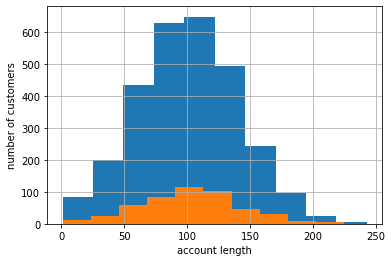

In [6]:
#Visualize the account length category for churn and loyal customers
df.groupby('churn')['account length'].hist()
plt.xlabel('account length') 
plt.ylabel('number of customers')

It appears that most customers tend to churn after four years with the company. Perhaps, for the first few years, they allow the contracts to auto-renew, and after that four years, they start reevaluating options?

In [7]:
#Check for null/missing values:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
#Check the data types for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [9]:
#Check for duplicates in the dataset
df.duplicated().sum()

0

No duplicates, no missing values. No complaints on my part! There are some object-type variables that I'm going to convert to numerical values. 

In [10]:
#Display some sample statistics and look for outliers 

desc_df = df.describe()

#add std metric at the bottom to look for outliers that 3 stds away from the mean
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000
+3_std,220.531124,564.296290,49.164106,343.177265,160.642896,58.340611,353.121881,159.882187,30.015543,352.593578,158.813539,15.866943,18.612812,11.863091,5.025899,5.509329
-3_std,-18.401511,310.068547,-32.966086,16.372930,40.228391,2.784004,48.838815,40.346436,4.151537,49.150496,41.401883,2.211706,1.861775,-2.904195,0.503264,-2.383617


False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


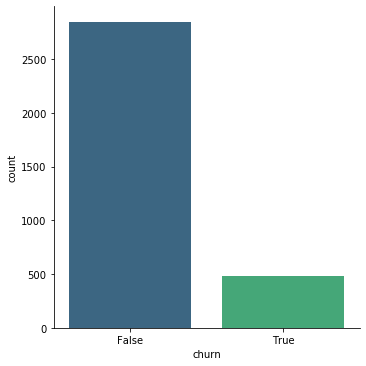

In [17]:
#Examine the how balanced our target class is:

print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize=True))
sns.catplot(x = "churn", kind = "count", data = df, palette='viridis', order = df['churn'].value_counts().index)

We see a clear class imbalance in our data: around 85.5% loyal customers and 14.4% customers who terminated their contracts. I'm going to use the SMOTE method to address this before I proceed to test potential models. Otherwise, I'll end up with models that are biased towards the majority class.

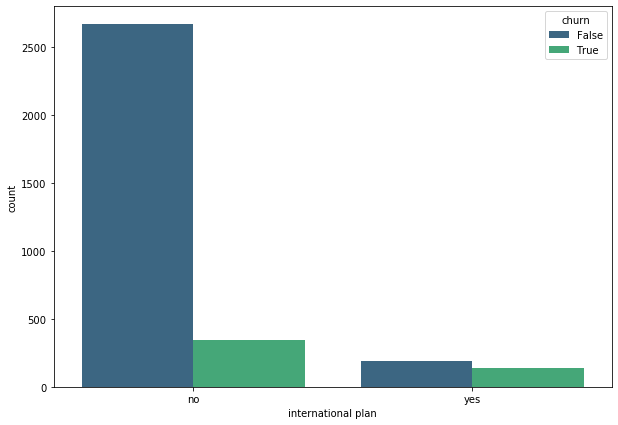

In [16]:
#Explore the relationship between having an international plan and churn
plt.figure(figsize=(10,7))
sns.countplot(x='international plan', hue='churn', data=df, palette='viridis', order = df['international plan'].value_counts().index)

**Conclusion:** It looks like customers who have purchased an international plan churn more than customers who don't have an international plan. This information is enough to retain this feature for the classification models.

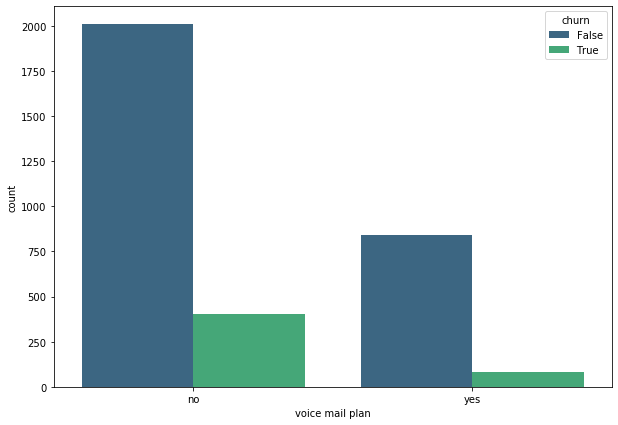

In [18]:
#Explore relationship between having a voicemail plan and churn
plt.figure(figsize=(10,7))
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='viridis', order = df['voice mail plan'].value_counts().index)

**Observation:** Having a voicemail plan doesn't seem to impact the decision to churn very strongly. 

415    1655
510     840
408     838
Name: area code, dtype: int64


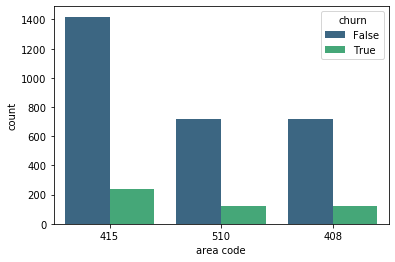

In [19]:
#Examine value distribution in Area Code and correlation with Target
print(df['area code'].value_counts())
sns.countplot(x='area code', hue='churn', data=df, palette='viridis', order = df['area code'].value_counts().index)

Having only three area codes across all states seems odd and not very useful. There also appears to be no evidence that one area code shows significantly higher churn than others. I'll drop area codes and phone numbers (they are all unique) as two features that are not relevant for the prediction models.

In [20]:
#Remove features/columns that are of no interest for this analysis 
df.drop(['area code', 'phone number'], axis=1, inplace=True)

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


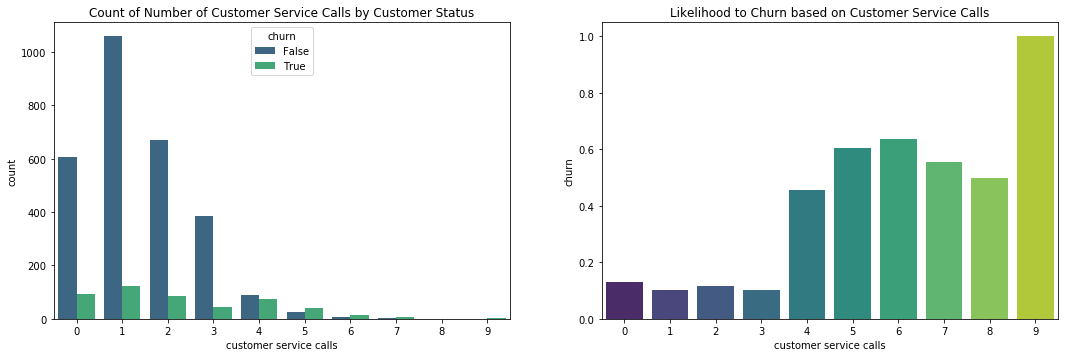

In [21]:
#Examine value distribution in Area Code and correlation with Target
print(df['customer service calls'].value_counts())
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.countplot(x='customer service calls', hue='churn',data=df, palette='viridis')
plt.title('Count of Number of Customer Service Calls by Customer Status')
plt.subplot(222)
sns.barplot(x='customer service calls', y='churn', data=df, ci=None, palette='viridis')
plt.title('Likelihood to Churn based on Customer Service Calls')
plt.show()

**Conclusion:** It looks like a customer is more likely to churn if they've made four or more calls to the Customer Service department. It might be a signal that these customers are dealing with a recurring issue.

In [22]:
#Transforming the columns containg object type into numerical values
df["international plan"] = df['international plan'].map({"yes":1,"no":0})
df["voice mail plan"] = df['voice mail plan'].map({"yes":1,"no":0})
df["churn"] = df['churn'].map({True:1, False:0})

In [23]:
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


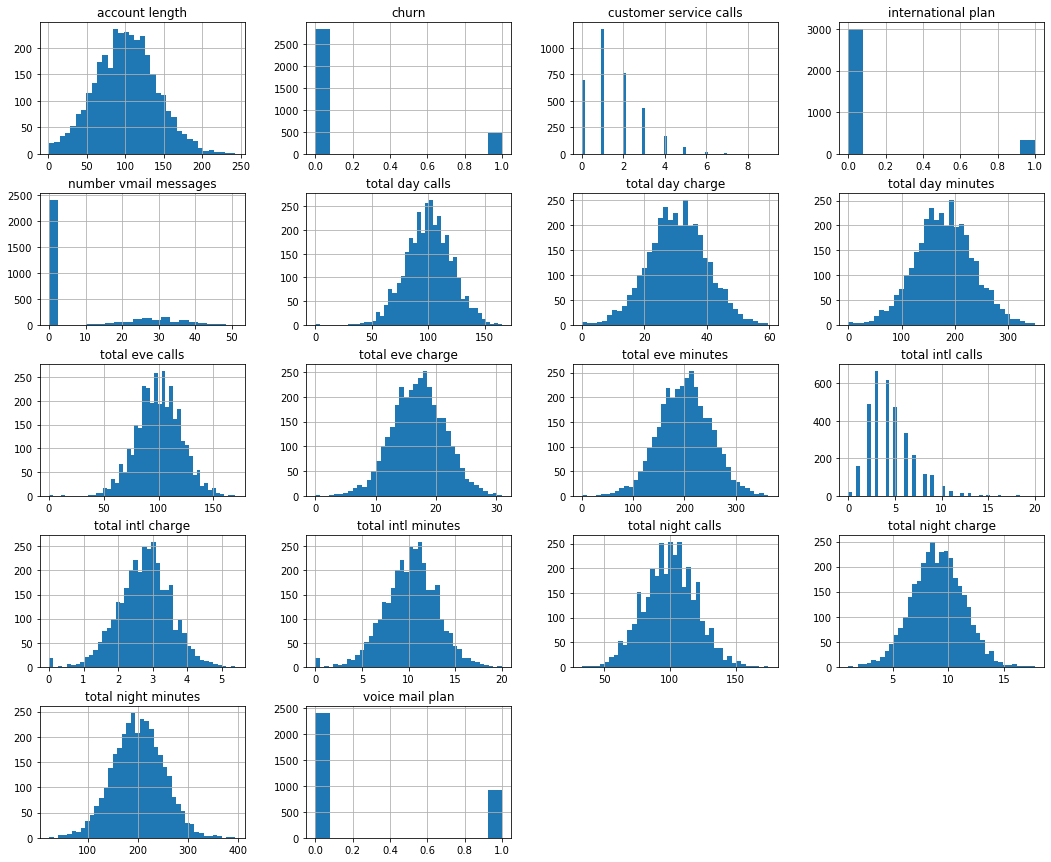

In [24]:
#Let's explore the distribution of each feature by plotting a histogram for each:
df.hist(figsize=(18,15), bins='auto');

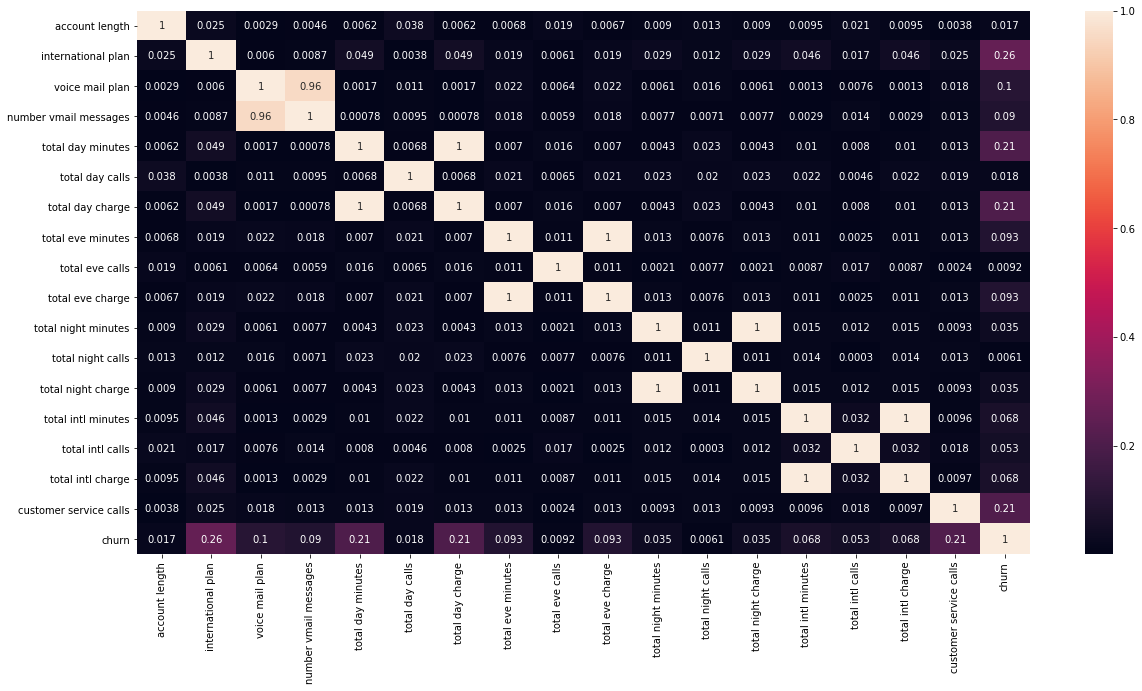

In [26]:
#Explore the correlation between different features 
corr = df.corr().abs()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [27]:
#Explore the correlation between each feature and our target class

df.corr()['churn']

account length            0.016541
international plan        0.259852
voice mail plan          -0.102148
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

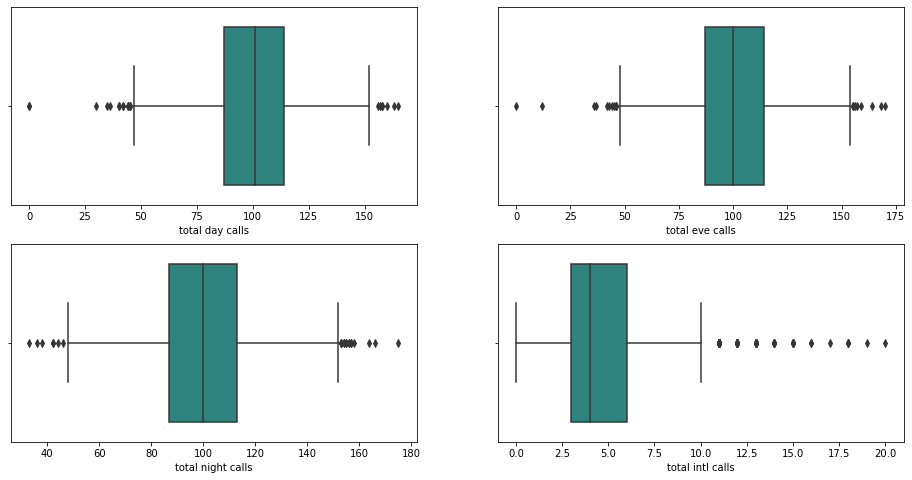

In [28]:
#Create boxplots to visualize how # of calls changes according to time of the day (and also internatioanlly)
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x=df['total day calls'], palette='viridis')
plt.subplot(222)
sns.boxplot(x=df['total eve calls'], palette='viridis')
plt.subplot(223)
sns.boxplot(x=df['total night calls'], palette='viridis')
plt.subplot(224)
sns.boxplot(x=df['total intl calls'], palette='viridis')

In [29]:
#Let's look at the more extreme outlier in daily calls where the person hasn't made any daily calls
df.loc[df['total day calls'] == 0]

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,0,0,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1397,VT,101,0,0,0,0.0,0,0.0,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0


While a bit unusual, these two cases seem like valid data. I'll keep them in the dataset as I don't believe they will skew the algorithms too much and cause overfitting. 
<br><br>
Next, let's look at the relationship between the state where the customer lives and churn.

In [30]:
#Let's break down churn values by state into a new Series
state_churn = df.groupby('state')['churn'].value_counts(normalize=True)

In [31]:
state_churn

state  churn
AK     0        0.942308
       1        0.057692
AL     0        0.900000
       1        0.100000
AR     0        0.800000
                  ...   
WI     1        0.089744
WV     0        0.905660
       1        0.094340
WY     0        0.883117
       1        0.116883
Name: churn, Length: 102, dtype: float64

In [32]:
#Let's convert it to a data frame and properly name the column representing the proportions per state
state_churn = pd.DataFrame(state_churn)
state_churn.columns = ['churn_percentage']

In [33]:
#Let's reset the index of the new dataframe before we create a graph from it
state_churn = state_churn.reset_index()

Text(0.5, 1, 'Churn by State')

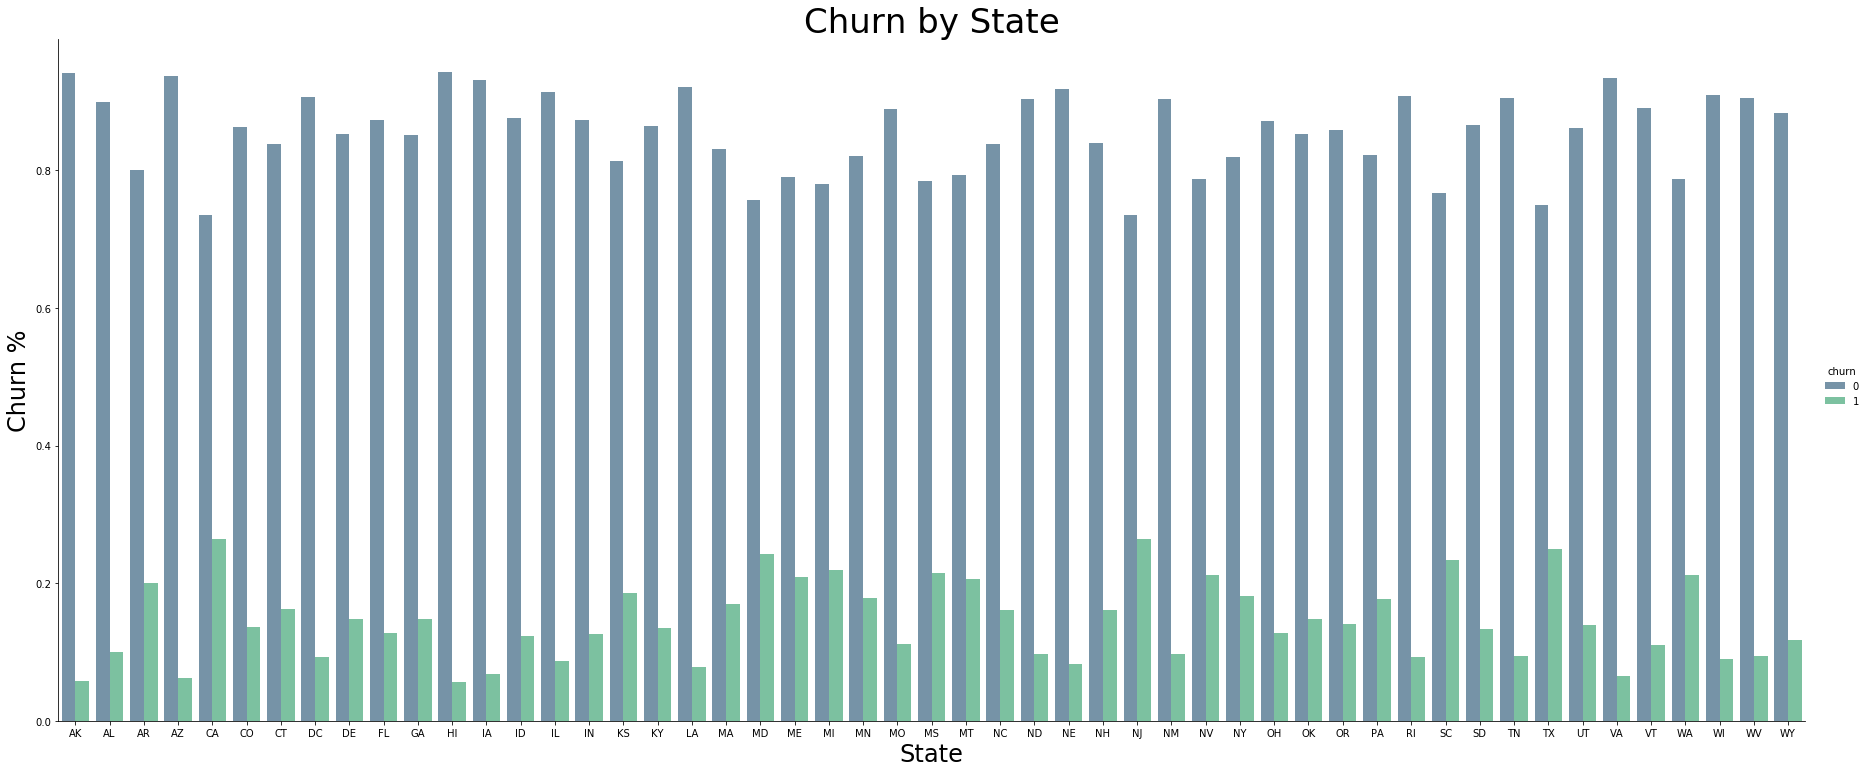

In [34]:
#Visualize churn by state with a categorical plot
sns.catplot(data=state_churn, kind='bar',
            x='state', y='churn_percentage', hue='churn',
            alpha=.7, height=10, aspect=2.5, palette='viridis')
plt.xlabel('State', fontsize=24)
plt.ylabel('Churn %', fontsize=24)
plt.title('Churn by State', fontsize=34)

Some states have a higher proportion of churn than others. The feature seems like a valid predictor that could strengthen the models. Therefore I'm keeping "state" for now.

In [35]:
#Replacing space with underscore in all column names for ease of use in modeling 
df.columns = df.columns.str.replace(' ','_')

### Engineer New features 

Create new features to represent total service utilization. 

In [36]:
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [37]:
df[['total_calls','total_minutes','total_charge' ]].describe()

,total_calls,total_minutes,total_charge
count,3333.000000,3333.000000,3333.000000
mean,305.137114,591.864776,59.449754
std,34.448164,89.954251,10.502261
min,191.000000,284.300000,22.930000
25%,282.000000,531.500000,52.380000
50%,305.000000,593.600000,59.470000
75%,328.000000,652.400000,66.480000
max,416.000000,885.000000,96.150000


In [38]:
#Finding total revenue to telecom company

total_rev = df.total_charge.sum()
rev_loyal = np.sum(df.loc[df['churn']==0]['total_charge'])
rev_churn = np.sum(df.loc[df['churn']==1]['total_charge'])

print('Total revenue: ${}'.format(round(total_rev,2)))
print('Total revevenue from retained customers: ${}'.format(round(rev_loyal,2)))
print('Total revenue from lost customers: ${}'.format(round(rev_churn,2)))
print('-------------------------------------------------')
print('Retained customers --> {}% of revenue'.format(round((rev_loyal/total_rev)*100,2)))
print('Lost customers --> {}% of revenue'.format(round((rev_churn/total_rev)*100,2)))

Total revenue: $198146.03
Total revevenue from retained customers: $166579.1
Total revenue from lost customers: $31566.93
-------------------------------------------------
Retained customers --> 84.07% of revenue
Lost customers --> 15.93% of revenue


It appears that the loss in revenue is pretty proportional to the loss in the number of customers. It doesn't seem like some of the lost customers were more significant revenue drivers than others.

Text(0.5, 1.0, 'Total Charge for Loyal/Churn Customers')

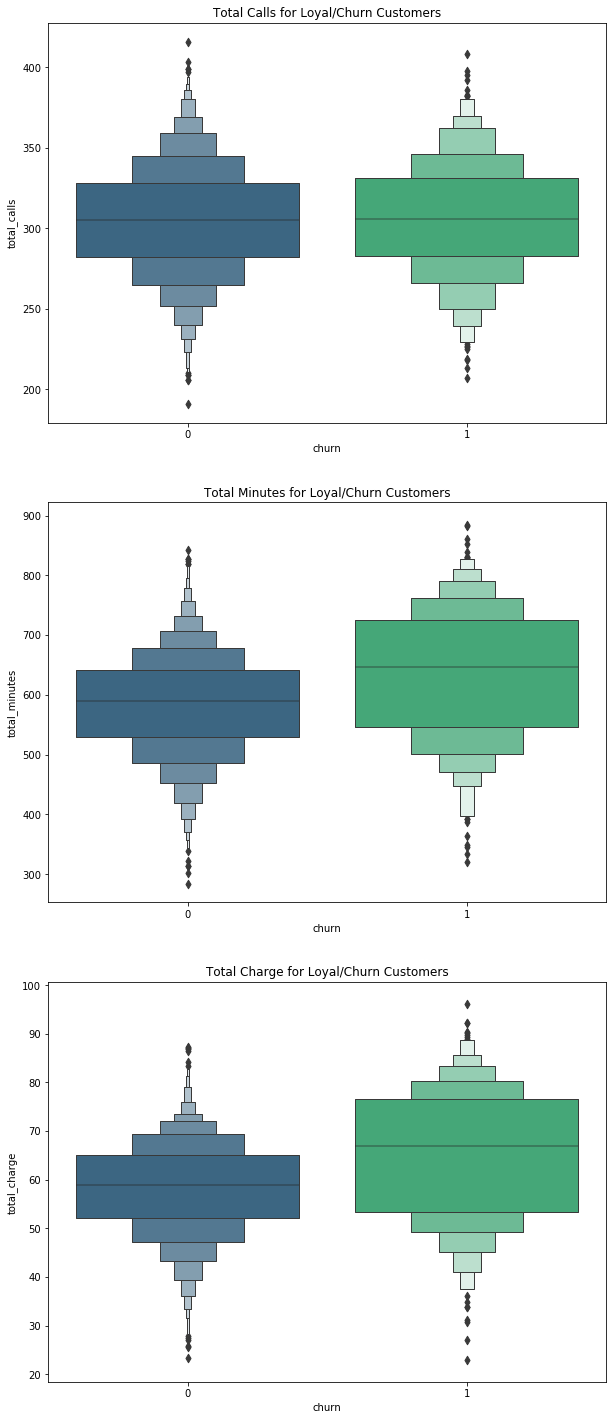

In [39]:
plt.figure(figsize=(22,25))
plt.subplot(321)
sns.boxenplot(x='churn', y='total_calls',
              data=df, palette='viridis')
plt.title('Total Calls for Loyal/Churn Customers')
plt.subplot(323)
sns.boxenplot(x='churn', y='total_minutes',
              data=df, palette='viridis')
plt.title('Total Minutes for Loyal/Churn Customers')
plt.subplot(325)
sns.boxenplot(x='churn', y='total_charge',
              data=df, palette='viridis')
plt.title('Total Charge for Loyal/Churn Customers')

**Observation:** Based on these plots, it's safe to assume that no customer terminates their contract with the company before making at least 200 calls. Other than that, the total number of calls for both departed and loyal customers seems pretty similar, with the mean of the boxplots being the same. 

Total minutes and total charge follow the same distribution because the cost is based on price-per-minute. Most customers who churn have accumulated a balance of at least 60 dollars. More customers begin canceling their contracts after their balance reaches about 40 dollars.

In [ ]:
# Export data for vanilla modeling - commenting out the method so it doesn't run when I re-run the kernel

#df.to_csv(r'data/clean_churn_cata.csv', index = False)